In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs) 

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
 
    # Add 1 to the record count.
    record_count += 1

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ancud
Processing Record 2 of Set 1 | kaduqli
Processing Record 3 of Set 1 | praia da vitoria
Processing Record 4 of Set 1 | najran
Processing Record 5 of Set 1 | fort saint john
City not found. Skipping...
Processing Record 6 of Set 1 | sibolga
Processing Record 7 of Set 1 | nosy varika
Processing Record 8 of Set 1 | severo-kurilsk
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | ponta do sol
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | pareora
Processing Record 13 of Set 1 | pochutla
Processing Record 14 of Set 1 | baykit
Processing Record 15 of Set 1 | saint-philippe
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | west monroe
Processing Record 18 of Set 1 | naica
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | mutis
Processing Record 21 of Set 1 | florianopolis
Processing Record 22 of Set 1 | camac

Processing Record 37 of Set 4 | samusu
City not found. Skipping...
Processing Record 38 of Set 4 | biankouma
Processing Record 39 of Set 4 | dolbeau
City not found. Skipping...
Processing Record 40 of Set 4 | bonavista
Processing Record 41 of Set 4 | kavaratti
Processing Record 42 of Set 4 | faya
Processing Record 43 of Set 4 | medicine hat
Processing Record 44 of Set 4 | mamallapuram
Processing Record 45 of Set 4 | tasiilaq
Processing Record 46 of Set 4 | zhigansk
Processing Record 47 of Set 4 | pointe michel
Processing Record 48 of Set 4 | marawi
Processing Record 49 of Set 4 | caconda
Processing Record 50 of Set 4 | tuktoyaktuk
Processing Record 1 of Set 5 | cidreira
Processing Record 2 of Set 5 | samalaeulu
City not found. Skipping...
Processing Record 3 of Set 5 | clyde river
Processing Record 4 of Set 5 | east retford
Processing Record 5 of Set 5 | hof
Processing Record 6 of Set 5 | coihaique
Processing Record 7 of Set 5 | tiksi
Processing Record 8 of Set 5 | tuatapere
Processing

Processing Record 27 of Set 8 | abaete
Processing Record 28 of Set 8 | omsukchan
Processing Record 29 of Set 8 | lompoc
Processing Record 30 of Set 8 | canutama
Processing Record 31 of Set 8 | indi
Processing Record 32 of Set 8 | surt
Processing Record 33 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 34 of Set 8 | bolshevik
Processing Record 35 of Set 8 | huarmey
Processing Record 36 of Set 8 | maniitsoq
Processing Record 37 of Set 8 | oga
Processing Record 38 of Set 8 | marang
Processing Record 39 of Set 8 | doha
Processing Record 40 of Set 8 | belyy yar
Processing Record 41 of Set 8 | gizo
Processing Record 42 of Set 8 | mahajanga
Processing Record 43 of Set 8 | dinsor
City not found. Skipping...
Processing Record 44 of Set 8 | erzin
Processing Record 45 of Set 8 | linares
Processing Record 46 of Set 8 | tahe
Processing Record 47 of Set 8 | bell ville
Processing Record 48 of Set 8 | mahon
Processing Record 49 of Set 8 | roald
Processing Record 50 of Set 8 | banda

Processing Record 12 of Set 12 | shamary
Processing Record 13 of Set 12 | hamilton
Processing Record 14 of Set 12 | esperance
Processing Record 15 of Set 12 | severodvinsk
Processing Record 16 of Set 12 | ithaca
Processing Record 17 of Set 12 | kologriv
Processing Record 18 of Set 12 | saint anthony
Processing Record 19 of Set 12 | nelson bay
Processing Record 20 of Set 12 | chapais
Processing Record 21 of Set 12 | atagay
Processing Record 22 of Set 12 | naze
Processing Record 23 of Set 12 | chak jhumra
Processing Record 24 of Set 12 | harper
Processing Record 25 of Set 12 | puerto baquerizo moreno
Processing Record 26 of Set 12 | springbok
Processing Record 27 of Set 12 | ruatoria
City not found. Skipping...
Processing Record 28 of Set 12 | zhanaozen
Processing Record 29 of Set 12 | halifax
Processing Record 30 of Set 12 | terrace
Processing Record 31 of Set 12 | nouadhibou
Processing Record 32 of Set 12 | gladstone
Processing Record 33 of Set 12 | indramayu
Processing Record 34 of Se

In [7]:
city_data

[{'City': 'Ancud',
  'Lat': -41.8697,
  'Lng': -73.8203,
  'Max Temp': 56.23,
  'Humidity': 93,
  'Cloudiness': 97,
  'Wind Speed': 10.83,
  'Country': 'CL',
  'Date': '2021-12-07 10:04:39'},
 {'City': 'Kaduqli',
  'Lat': 11.0167,
  'Lng': 29.7167,
  'Max Temp': 97.61,
  'Humidity': 12,
  'Cloudiness': 9,
  'Wind Speed': 9.04,
  'Country': 'SD',
  'Date': '2021-12-07 10:05:05'},
 {'City': 'Praia Da Vitoria',
  'Lat': 38.7333,
  'Lng': -27.0667,
  'Max Temp': 61.75,
  'Humidity': 85,
  'Cloudiness': 67,
  'Wind Speed': 16.55,
  'Country': 'PT',
  'Date': '2021-12-07 10:05:05'},
 {'City': 'Najran',
  'Lat': 17.4924,
  'Lng': 44.1277,
  'Max Temp': 77.29,
  'Humidity': 12,
  'Cloudiness': 0,
  'Wind Speed': 10.11,
  'Country': 'SA',
  'Date': '2021-12-07 10:04:10'},
 {'City': 'Sibolga',
  'Lat': 1.7427,
  'Lng': 98.7792,
  'Max Temp': 83.71,
  'Humidity': 70,
  'Cloudiness': 17,
  'Wind Speed': 2.73,
  'Country': 'ID',
  'Date': '2021-12-07 10:05:06'},
 {'City': 'Nosy Varika',
  'Lat': -2

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ancud,-41.8697,-73.8203,56.23,93,97,10.83,CL,2021-12-07 10:04:39
1,Kaduqli,11.0167,29.7167,97.61,12,9,9.04,SD,2021-12-07 10:05:05
2,Praia Da Vitoria,38.7333,-27.0667,61.75,85,67,16.55,PT,2021-12-07 10:05:05
3,Najran,17.4924,44.1277,77.29,12,0,10.11,SA,2021-12-07 10:04:10
4,Sibolga,1.7427,98.7792,83.71,70,17,2.73,ID,2021-12-07 10:05:06
5,Nosy Varika,-20.5833,48.5333,84.02,60,27,10.56,MG,2021-12-07 10:05:06
6,Severo-Kurilsk,50.6789,156.1250,30.79,61,82,34.54,RU,2021-12-07 10:05:06
7,Punta Arenas,-53.1500,-70.9167,44.71,65,75,25.32,CL,2021-12-07 10:05:07
8,Ponta Do Sol,32.6667,-17.1000,67.71,63,46,4.94,PT,2021-12-07 10:01:57
9,Vaini,-21.2000,-175.2000,77.86,78,98,17.67,TO,2021-12-07 10:05:07


In [9]:
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp","Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ancud,CL,2021-12-07 10:04:39,-41.8697,-73.8203,56.23,93,97,10.83
1,Kaduqli,SD,2021-12-07 10:05:05,11.0167,29.7167,97.61,12,9,9.04
2,Praia Da Vitoria,PT,2021-12-07 10:05:05,38.7333,-27.0667,61.75,85,67,16.55
3,Najran,SA,2021-12-07 10:04:10,17.4924,44.1277,77.29,12,0,10.11
4,Sibolga,ID,2021-12-07 10:05:06,1.7427,98.7792,83.71,70,17,2.73
5,Nosy Varika,MG,2021-12-07 10:05:06,-20.5833,48.5333,84.02,60,27,10.56
6,Severo-Kurilsk,RU,2021-12-07 10:05:06,50.6789,156.1250,30.79,61,82,34.54
7,Punta Arenas,CL,2021-12-07 10:05:07,-53.1500,-70.9167,44.71,65,75,25.32
8,Ponta Do Sol,PT,2021-12-07 10:01:57,32.6667,-17.1000,67.71,63,46,4.94
9,Vaini,TO,2021-12-07 10:05:07,-21.2000,-175.2000,77.86,78,98,17.67


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

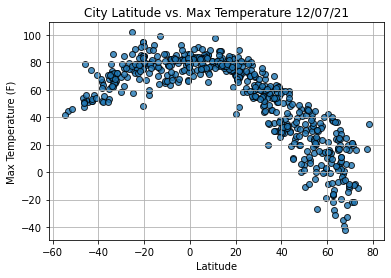

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

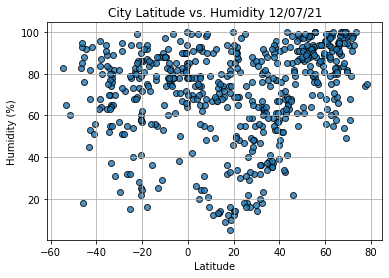

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

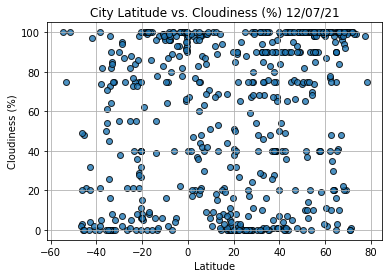

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

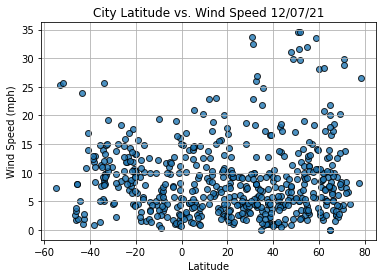

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates) :
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

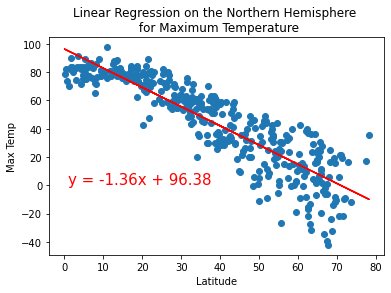

In [18]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(1,1))

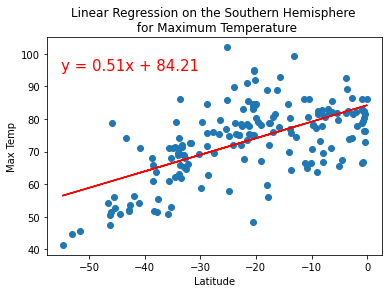

In [19]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-55,95))

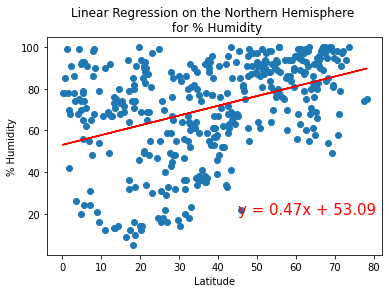

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(45,20))

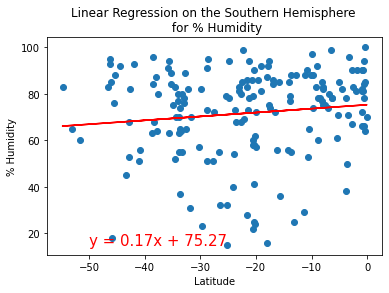

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

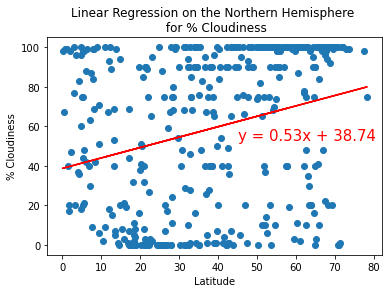

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(45,53))

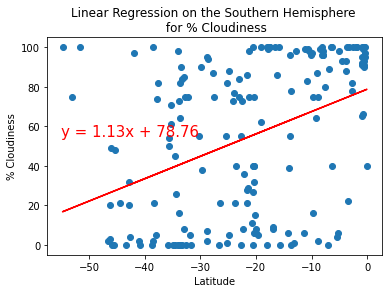

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-55,55))

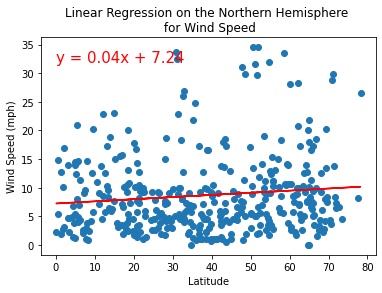

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(0,32))

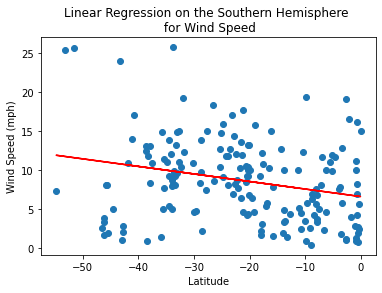

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(-55,55))